# Desafio 2

El supermercado "FreshMart" se ha convertido en el lugar preferido para realizar las compras del día a día. Con el objetivo de
brindar una experiencia de compra más personalizada, "FreshMart" ha decidido emplear técnicas de aprendizaje no supervisado para segmentar a sus clientes y diseñar estrategias de marketing adaptadas a sus necesidades y preferencias.

El objetivo principal de la segmentación de clientes es identificar grupos específicos dentro de la base de clientes de "FreshMart" que puedan beneficiarse de promociones y campañas de marketing personalizadas. La idea es poder caracterizar estos segmentos y ponerle un nombre a cada uno.
La data entregada esta a nivel de boleta y tiene los siguientes campos:
- InvoiceNo: Nro identificador de cada boleta
- InvoiceDate: Fecha de la boleta
- CustomerId: Nro identificador de cada usuario
- Quantity: Cantidad de unidades totales compradas
- price_total: Precio total de la boleta
- StockCode: Cantidad de unidades diferentes compradas

## Desarrollo

### Pregunta 1

Leer el archivo Retail_Invoices.xlsx y realizar un análisis de calidad de datos, para definir la calidad de la data entregada considerando valores anómalos, valores faltantes, etc. Limpia lo que sea necesario y realiza un análisis exploratorio de los datos considerando gráficos de distribuciones y correlaciones entre estos.

In [1]:
import pandas as pd
import numpy as np
import missingno as msngo
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carga del archivo Excel
df=pd.read_excel('Data/Retail_Invoices.xlsx')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [3]:
# Información general del DataFrame
df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,InvoiceDate,CustomerID,Quantity,price_total,StockCode
count,22190,22190.000000,22190.000000,22190.000000,22190.000000
mean,2011-06-29 05:59:15.223073536,15238.498738,221.130599,374.045327,18.333889
min,2010-12-01 00:00:00,12346.000000,-80995.000000,-168469.600000,1.000000
25%,2011-03-29 00:00:00,13755.000000,30.000000,87.962500,3.000000
50%,2011-07-08 00:00:00,15136.000000,120.000000,241.505000,12.000000
75%,2011-10-10 00:00:00,16746.000000,254.000000,418.022500,24.000000
max,2011-12-09 00:00:00,18287.000000,80995.000000,168469.600000,542.000000
std,NaN,1733.149624,1170.215301,2018.482869,23.892111


In [5]:
df[df.Quantity < 0]

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
18536,C536379,2010-12-01,14527,-1,-27.50,1
18537,C536383,2010-12-01,15311,-1,-4.65,1
18538,C536391,2010-12-01,17548,-132,-141.48,7
18539,C536506,2010-12-01,17897,-6,-25.50,1
18540,C536543,2010-12-01,17841,-3,-3.80,2
...,...,...,...,...,...,...
22185,C581484,2011-12-09,16446,-80995,-168469.60,1
22186,C581490,2011-12-09,14397,-23,-32.53,2
22187,C581499,2011-12-09,15498,-1,-224.69,1
22188,C581568,2011-12-09,15311,-5,-54.75,1


Se observan datos negativos tanto en cantidad como en el precio total, estos se eliminaran, se asume que pueden ser devoluciones hechas en el periodo, pero no se tomaran en cuenta para este estudio

In [6]:
df = df[df.Quantity > 0]
df.describe()

,InvoiceDate,CustomerID,Quantity,price_total,StockCode
count,18536,18536.000000,18536.000000,18536.000000,18536.000000
mean,2011-07-01 03:51:21.053085952,15266.224158,279.547691,480.762187,21.467631
min,2010-12-01 00:00:00,12346.000000,1.000000,0.000000,1.000000
25%,2011-03-30 00:00:00,13773.500000,74.000000,157.930000,6.000000
50%,2011-07-12 00:00:00,15176.500000,155.000000,303.020000,15.000000
75%,2011-10-12 00:00:00,16779.000000,291.000000,471.660000,28.000000
max,2011-12-09 00:00:00,18287.000000,80995.000000,168469.600000,542.000000
std,NaN,1734.178524,976.796524,1678.029352,24.919243


<Axes: >

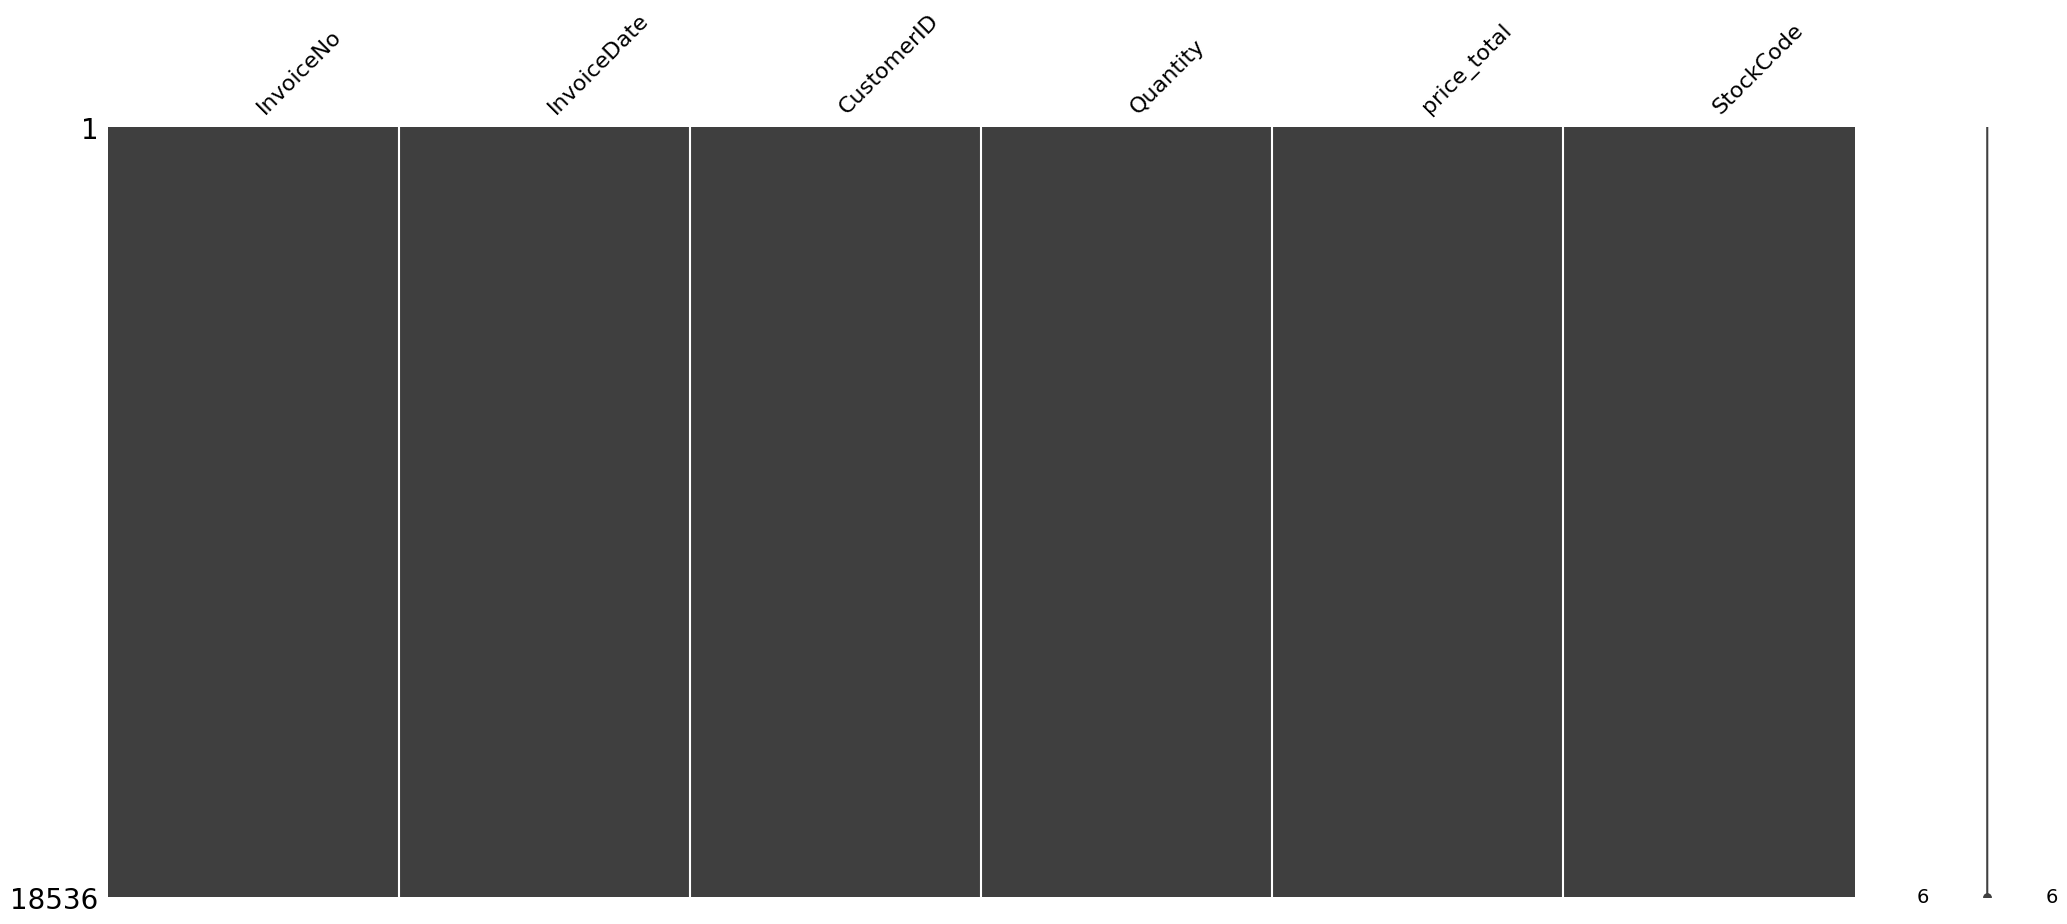

In [7]:
msngo.matrix(df)

No se observan datos faltantes en la muestra

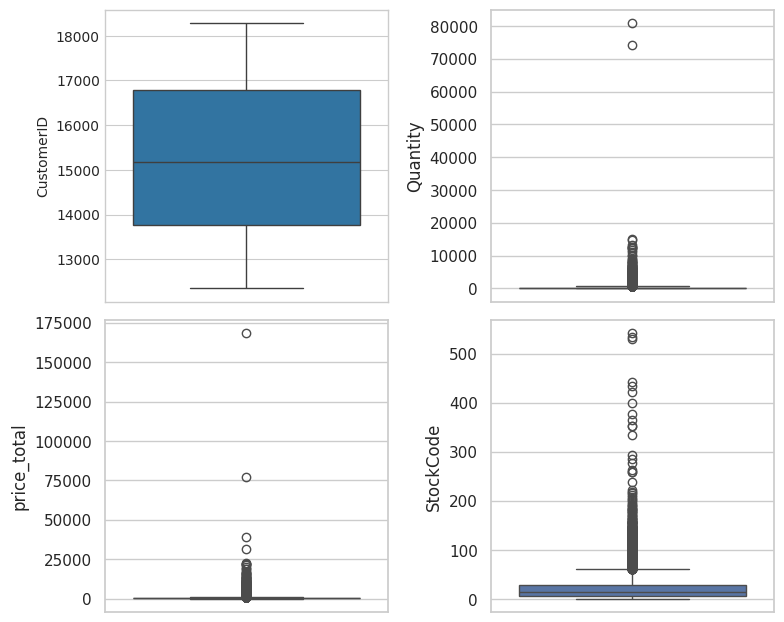

In [8]:
numeric_columns = df.select_dtypes(include=np.number).columns
plt.rcParams["figure.figsize"] = (8, 25)
plt.style.use('seaborn-v0_8-whitegrid')
for column in numeric_columns:
    plt.subplot(8,2, list(numeric_columns).index(column)+1)
    sns.set(style='whitegrid')
    sns.boxplot(y=column, data=df)
    plt.ylabel(column)
plt.tight_layout()

Se observa que la mayor parte de los clientes compran pocos productos por transaccion, esto se puede considerar mejor dado que el 75% mayor de los datos es 291 y el maximo de los datos es 80995, ese 25% tiene una gran diferencia en los datos 
Se considera realizar una prueba con los datos removiendo ourliers de cantidad de productos

,InvoiceDate,CustomerID,Quantity,price_total,StockCode
count,17186,17186.000000,17186.000000,17186.000000,17186.000000
mean,2011-06-30 11:40:03.491213568,15275.408123,176.223147,327.601099,19.792331
min,2010-12-01 00:00:00,12347.000000,1.000000,0.000000,1.000000
25%,2011-03-30 00:00:00,13777.000000,70.000000,149.610000,6.000000
50%,2011-07-10 00:00:00,15189.000000,142.000000,285.405000,15.000000
75%,2011-10-12 00:00:00,16782.000000,251.000000,416.945000,26.000000
max,2011-12-09 00:00:00,18287.000000,616.000000,38970.000000,239.000000
std,NaN,1730.472881,138.413568,398.605155,20.029376


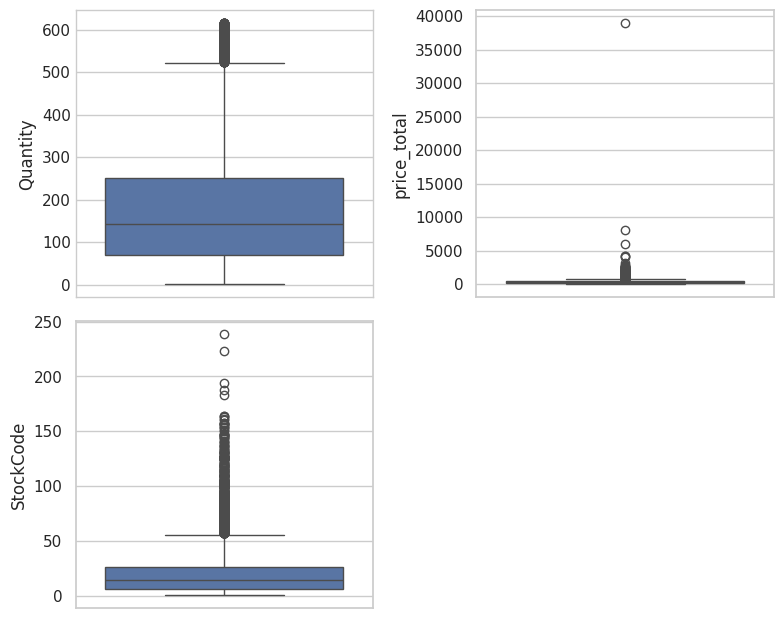

In [9]:
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return not_outliers
df['Quantity'] = drop_outliers_IQR(df.Quantity)
df = df.dropna()

numeric_columns = df.select_dtypes(include=np.number).columns
numeric_columns = ['Quantity','price_total','StockCode']
plt.rcParams["figure.figsize"] = (8, 25)
plt.style.use('seaborn-v0_8-whitegrid')
for column in numeric_columns:
    plt.subplot(8,2, list(numeric_columns).index(column)+1)
    sns.set(style='whitegrid')
    sns.boxplot(y=column, data=df)
    plt.ylabel(column)
plt.tight_layout()

df.describe()

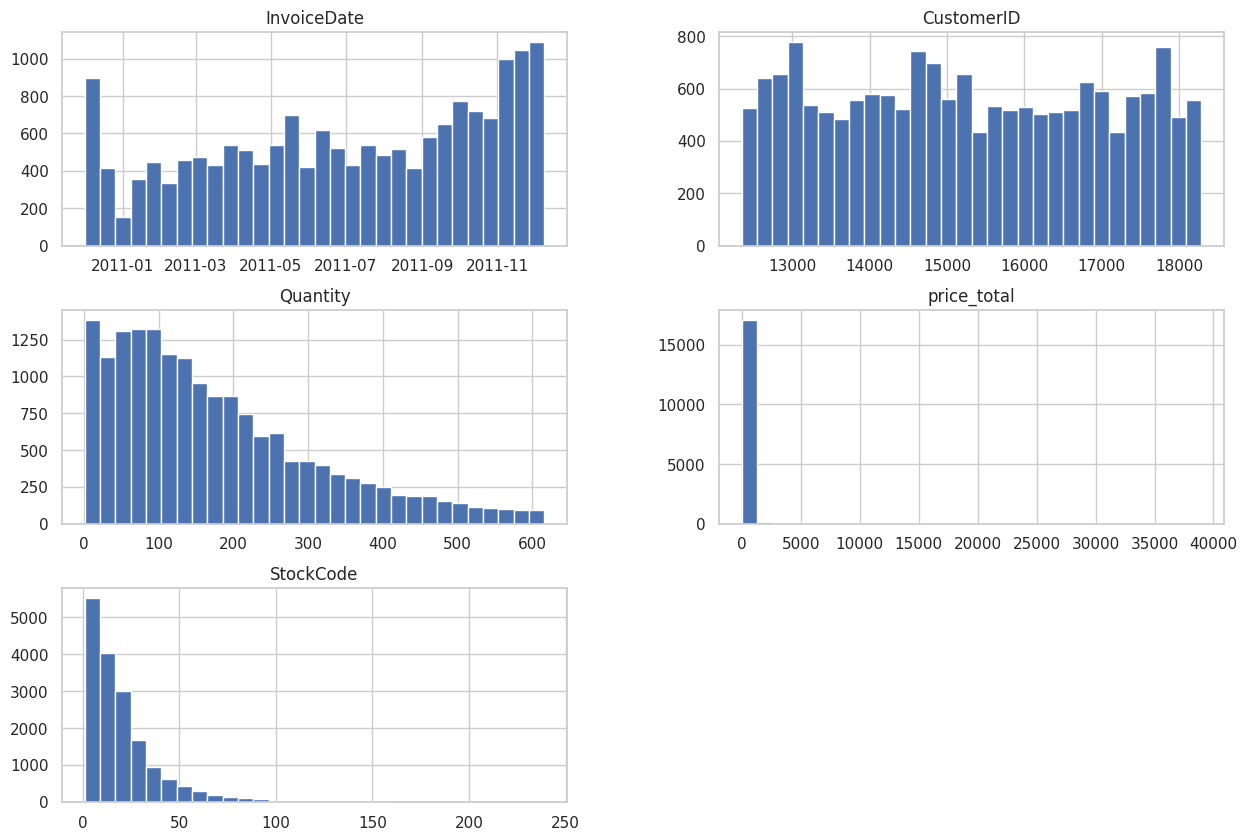

In [10]:
plt.rcParams["figure.figsize"] = (10, 6)
df.hist(bins=30, figsize=(15, 10))
plt.show()

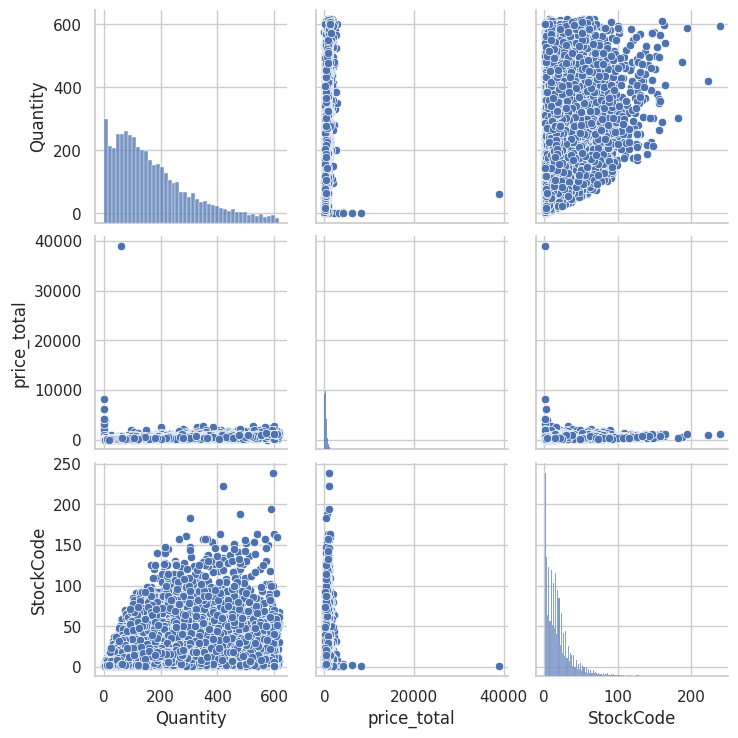

In [11]:
sns.pairplot(df[['Quantity', 'price_total', 'StockCode']])
plt.show()

In [12]:
# Revision fecha minima y maxima de dataFrame
(df['InvoiceDate'].min(), 
    df['InvoiceDate'].max(), 
    (df['InvoiceDate'].max().to_period('M')-df['InvoiceDate'].min().to_period('M'))
)

(Timestamp('2010-12-01 00:00:00'),
 Timestamp('2011-12-09 00:00:00'),
 <12 * MonthEnds>)

### Pregunta 2

Generar variables para la segmentación. Notar que la granularidad de la data es por boleta y se necesita segmentar clientes, por lo que es necesario generar variables a nivel de clientes. Se propone generar al menos RFM (Recencia, frecuencia y monto).


#### Calculo Recencia

Dadas las fechas minimas y maximas del conjunto de datos, se considera tomar como fecha de analisis el final del año 2011 para el calculoo de la recencia

In [13]:
fecha_referencia = pd.to_datetime('2011-12-31')
df_ultima_compra=df.groupby('CustomerID')['InvoiceDate']\
                    .max().reset_index()\
                    .rename(columns={'InvoiceDate':'UltimaCompra'})
df_ultima_compra['Recencia']=(fecha_referencia-df_ultima_compra.UltimaCompra).dt.days
df_ultima_compra['Recencia'].describe()

count    4236.000000
mean      116.261568
std       101.009621
min        22.000000
25%        40.000000
50%        73.000000
75%       173.000000
max       395.000000
Name: Recencia, dtype: float64

#### Calculo Frecuencia

La frecuencia la definiremos como cantidad de veces que compra un cliente en el mes en promedio

In [14]:
df['AnoMes']=df['InvoiceDate'].dt.strftime("%Y-%m")
df_frecuencia=df.groupby(by=['CustomerID', 'AnoMes'])['InvoiceNo'].count().reset_index()

In [15]:
df_frecuencia=df_frecuencia.groupby(by=['CustomerID'])['InvoiceNo'].sum().reset_index()\
                        .rename(columns={'InvoiceNo':'NroComprasMensual'})
df_frecuencia['MediaFrecuencia'] = df_frecuencia['NroComprasMensual'] / 12
df_frecuencia.MediaFrecuencia.describe()

count    4236.000000
mean        0.338094
std         0.581756
min         0.083333
25%         0.083333
50%         0.166667
75%         0.333333
max        16.916667
Name: MediaFrecuencia, dtype: float64

#### Calculo monto gastado

In [16]:
# Calcular el monto total gastado por cada cliente
df_monto = df.groupby('CustomerID')['price_total'].sum().reset_index()\
                    .rename(columns={'price_total':'MontoTotal'})
df_monto['MontoPromedio'] = df_monto.MontoTotal / 12
df_monto[['MontoTotal', 'MontoPromedio']].describe()

,MontoTotal,MontoPromedio
count,4236.000000,4236.000000
mean,1329.120041,110.760003
std,2727.396054,227.283004
min,2.900000,0.241667
25%,296.685000,24.723750
50%,626.880000,52.240000
75%,1421.867500,118.488958
max,90851.380000,7570.948333


In [17]:
# Combinar las variables RFM
df_cli = pd.merge(df_ultima_compra, df_frecuencia, on='CustomerID')
df_cli = pd.merge(df_cli, df_monto, on='CustomerID')
df_cli

,CustomerID,UltimaCompra,Recencia,NroComprasMensual,MediaFrecuencia,MontoTotal,MontoPromedio
0,12347,2011-12-07,24,6,0.500000,3015.68,251.306667
1,12348,2011-09-25,97,3,0.250000,904.44,75.370000
2,12350,2011-02-02,332,1,0.083333,334.40,27.866667
3,12352,2011-11-03,58,8,0.666667,2506.04,208.836667
4,12353,2011-05-19,226,1,0.083333,89.00,7.416667
...,...,...,...,...,...,...,...
4231,18280,2011-03-07,299,1,0.083333,180.60,15.050000
4232,18281,2011-06-12,202,1,0.083333,80.82,6.735000
4233,18282,2011-12-02,29,2,0.166667,178.05,14.837500
4234,18283,2011-12-06,25,16,1.333333,2094.88,174.573333


### Pregunta 3

Realizar un análisis exploratorio y las transformaciones necesarias a las nuevas variables.

In [18]:
df_cli = df_cli.drop(columns=['CustomerID', 'UltimaCompra'])
df_cli.describe()

,Recencia,NroComprasMensual,MediaFrecuencia,MontoTotal,MontoPromedio
count,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000
mean,116.261568,4.057129,0.338094,1329.120041,110.760003
std,101.009621,6.981070,0.581756,2727.396054,227.283004
min,22.000000,1.000000,0.083333,2.900000,0.241667
25%,40.000000,1.000000,0.083333,296.685000,24.723750
50%,73.000000,2.000000,0.166667,626.880000,52.240000
75%,173.000000,4.000000,0.333333,1421.867500,118.488958
max,395.000000,203.000000,16.916667,90851.380000,7570.948333


<Axes: >

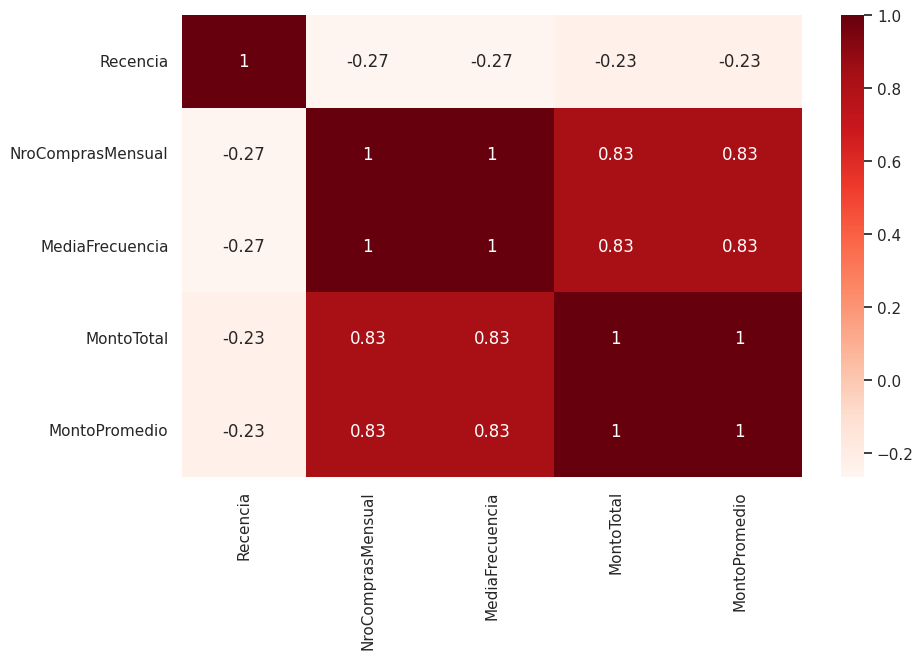

In [19]:
sns.heatmap(df_cli.corr(), annot=True, cmap='Reds')

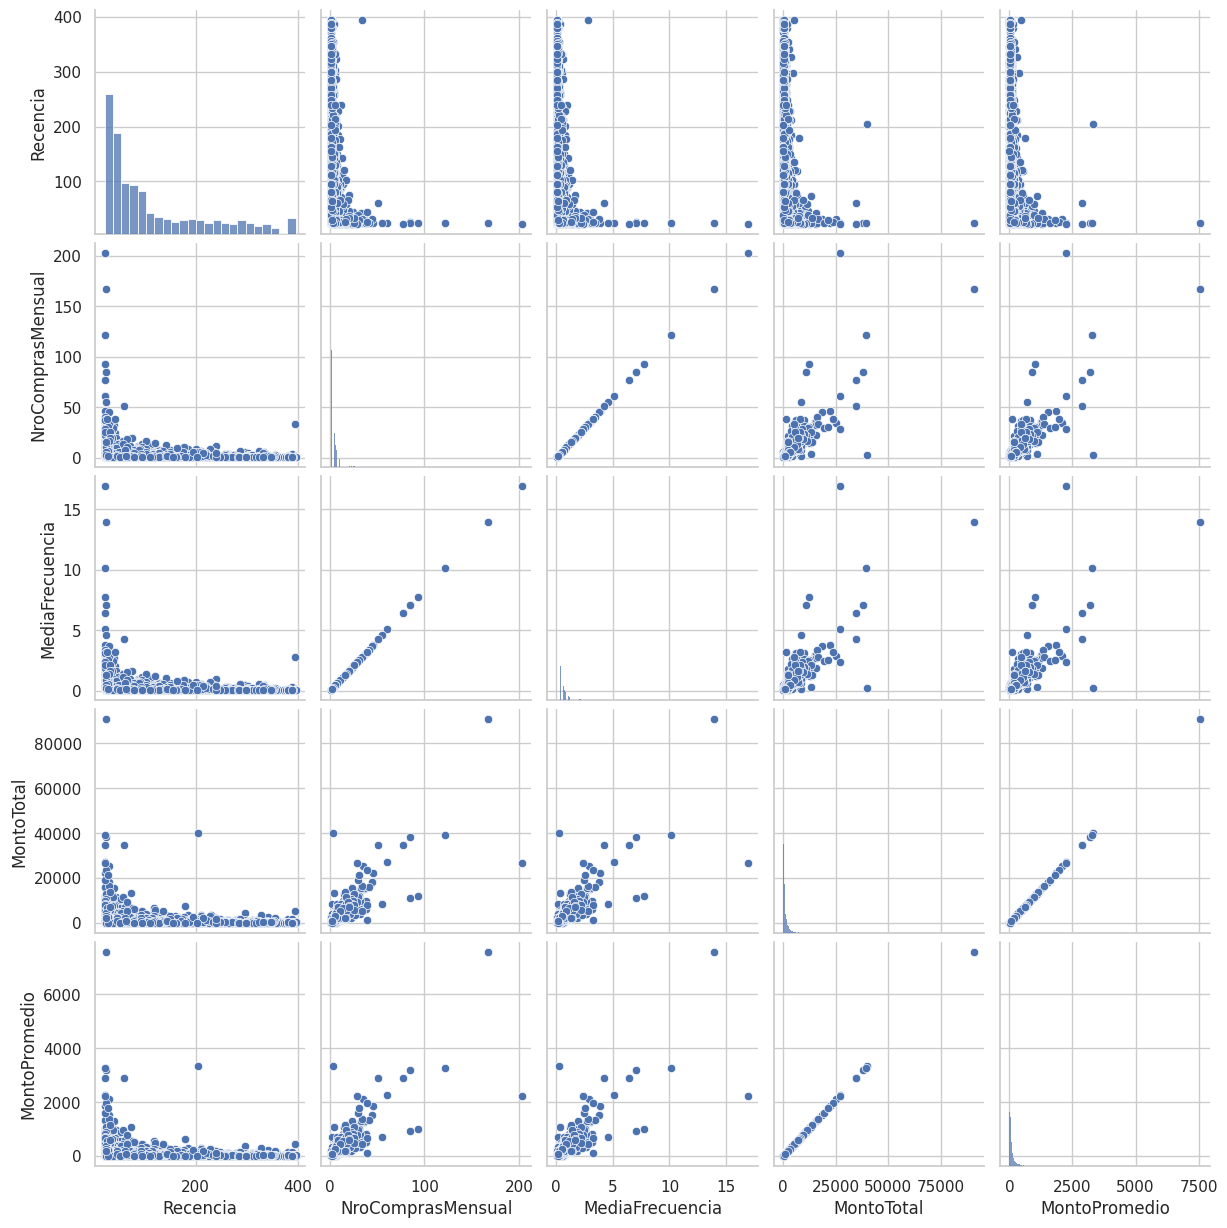

In [20]:
sns.pairplot(df_cli)

### Pregunta 4

Aplicar al menos 2 algoritmos de clustering. Buscar el número indicado de clusters que pueden tener y visualizar los cluster resultantes de los algoritmos.

In [21]:
# Usar el método del codo para determinar el número de clusters
# Usar k-means y o fuzzy means

Método del Codo
El método del codo (elbow method) es una técnica comúnmente utilizada para determinar el
número óptimo de clusters (K) en el algoritmo de clustering. La idea principal detrás del
método del codo es identificar el valor de K donde se produce un cambio significativo en la
variabilidad explicada por los clusters.
El procedimiento general del método del codo es el siguiente:
1. Ejecutar el algoritmo K-means para un rango de valores de K.
2. Calcular la suma de las distancias al cuadrado dentro de los clusters, para cada valor
de K. Esta métrica mide la variabilidad dentro de los clusters.
3. Graficar el valor de K en el eje x y la métrica intra cluster en el eje y.
4. Observar el gráfico y buscar el punto donde se produce un "codo" pronunciado o una
disminución significativa en la métrica intracluster. Este punto indica el número
óptimo de clusters según el método del codo

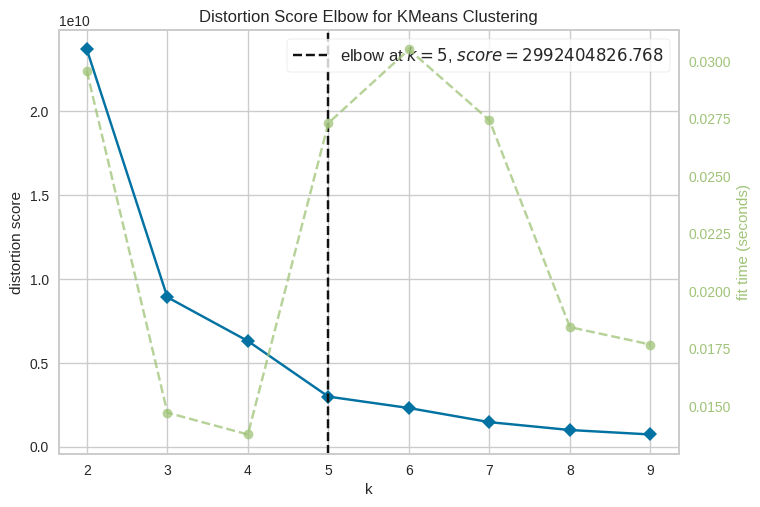

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
X_kmeans = df_cli.copy()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_kmeans)
visualizer.show()

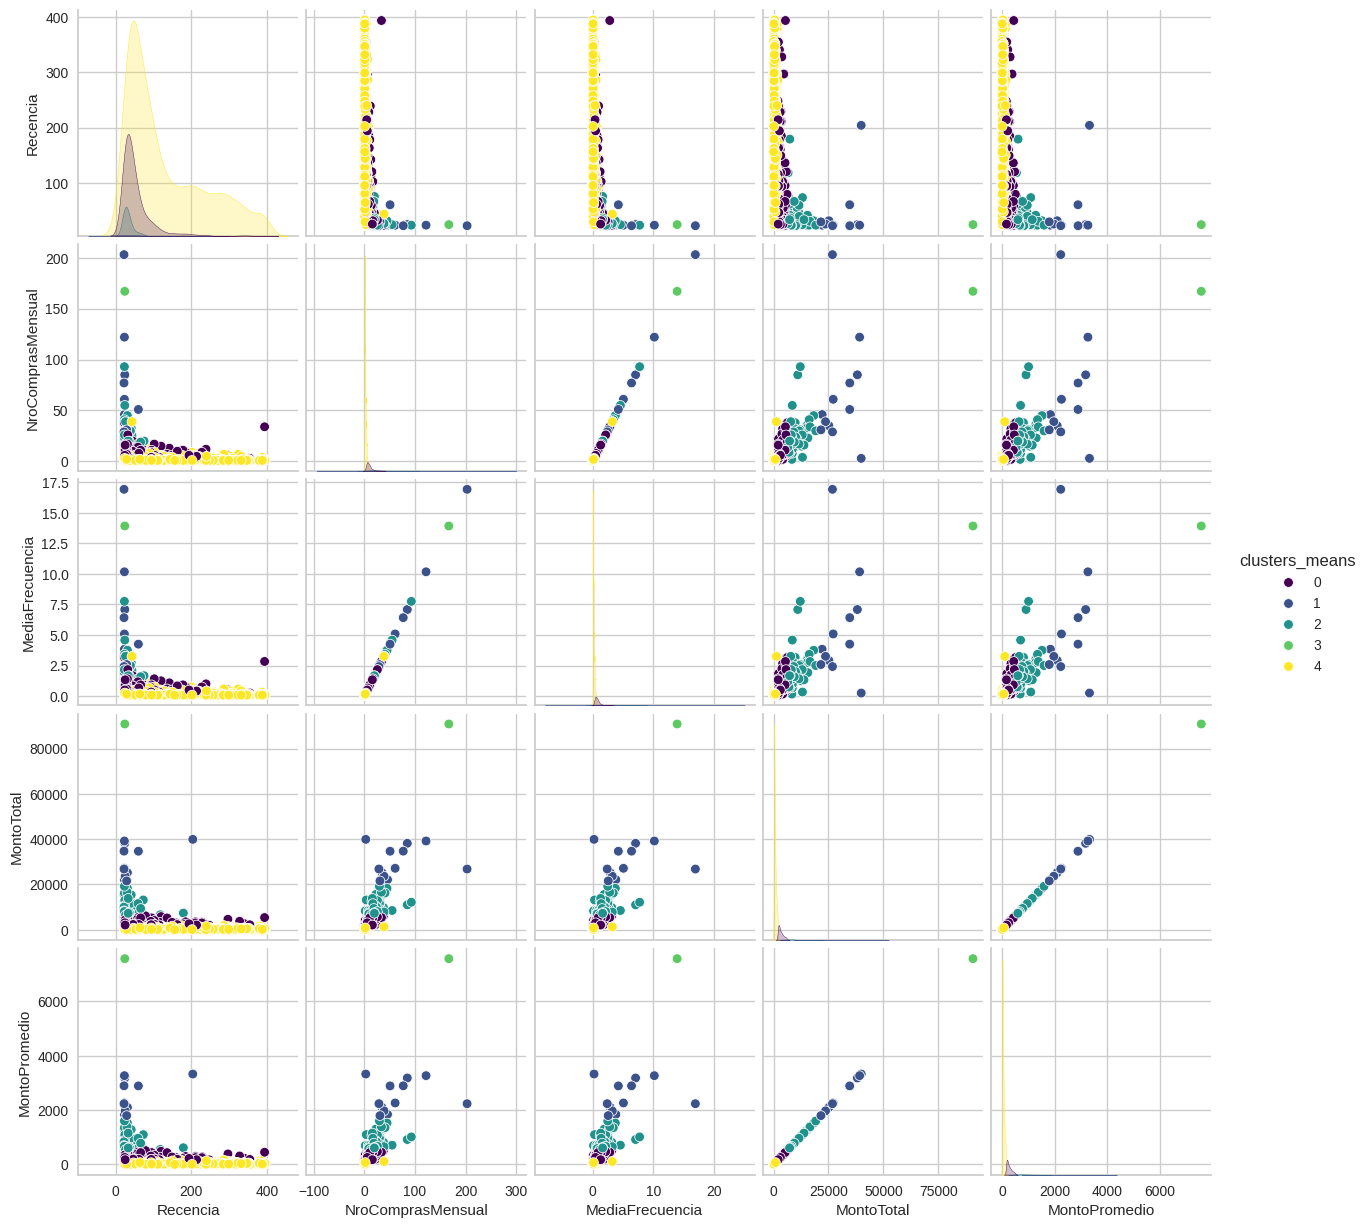

In [23]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
label = kmeans.fit_predict(X_kmeans)
X_kmeans['clusters_means'] =label
u_labels = np.unique(label)
sns.pairplot(X_kmeans, hue='clusters_means', palette='viridis')

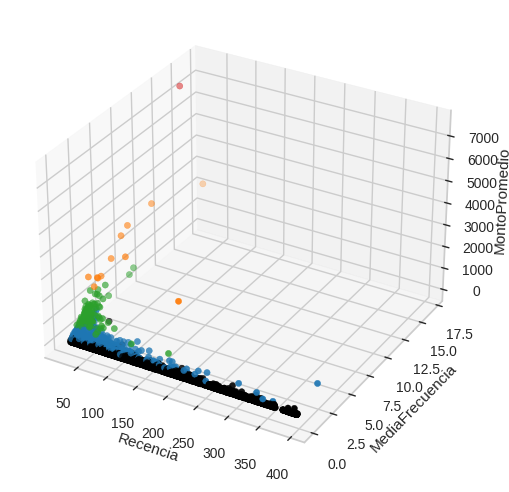

In [24]:
plt.rcParams["figure.figsize"] = (10, 6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = {0:'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'black'}
ax.scatter(X_kmeans['Recencia'], X_kmeans['MediaFrecuencia'], X_kmeans['MontoPromedio'], c=X_kmeans['clusters_means'].map(colors))
ax.set_xlabel('Recencia')
ax.set_ylabel('MediaFrecuencia')
ax.set_zlabel("MontoPromedio")
plt.show()

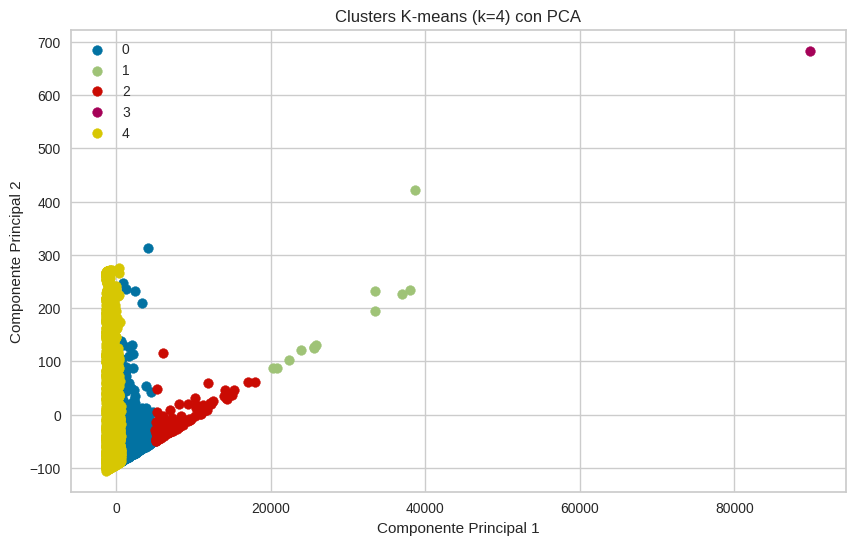

In [25]:
# Intentando con estandarizacion de datos
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(X_kmeans)

#plotting the results:
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
plt.title('Clusters K-means (k=4) con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [26]:
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score, davies_bouldin_score
X_fuzzy = df_cli.copy()
# Definir una lista de posibles valores de m
m_values = np.arange(1.1, 3.1, 0.1)

# Inicializar listas para almacenar las métricas
silhouette_scores = []
davies_bouldin_scores = []

# Realizar clustering fuzzy con diferentes valores de m y calcular las métricas
'''
cntr: Es una matriz que contiene los centroides finales de los clusters encontrados por el algoritmo Fuzzy C-Means. Cada fila representa un centroide y cada columna representa una característica.

u: Es una matriz que contiene los grados de pertenencia de cada punto a cada cluster. Cada fila representa un punto y cada columna representa un cluster. Los valores en u son números entre 0 y 1 que representan la probabilidad de que un punto pertenezca a cada cluster.

u0: Es una matriz que contiene los grados de pertenencia iniciales de cada punto a cada cluster. Al inicio del algoritmo, estos valores se inicializan aleatoriamente o de alguna otra manera.

d: Es una matriz que contiene las distancias entre los puntos y los centroides finales de los clusters. Cada fila representa un punto y cada columna representa un cluster.

jm: Es el valor de la función objetivo del clustering fuzzy. Representa el valor de la función de costo que se intenta minimizar durante el proceso de clustering.

p: Es un valor que representa el exponente utilizado en la función de costo para el clustering fuzzy.

fpc: Es el índice de partición fuzzy. Representa la fracción de puntos que se encuentran correctamente asignados en los clusters finales.

'''


for m in m_values:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_fuzzy.T, 5, m, error=0.005, maxiter=1000) #explicar este código
    labels = np.argmax(u, axis=0)

    # Calcular la puntuación de silueta
    silhouette_scores.append(silhouette_score(X_fuzzy, labels))

    # Calcular el índice de Dunn
    dunn_index = davies_bouldin_score(X_fuzzy, labels)
    davies_bouldin_scores.append(dunn_index)

# Encontrar el valor óptimo de m basado en la puntuación de silueta
optimal_index = np.argmax(silhouette_scores)
optimal_m = m_values[optimal_index]

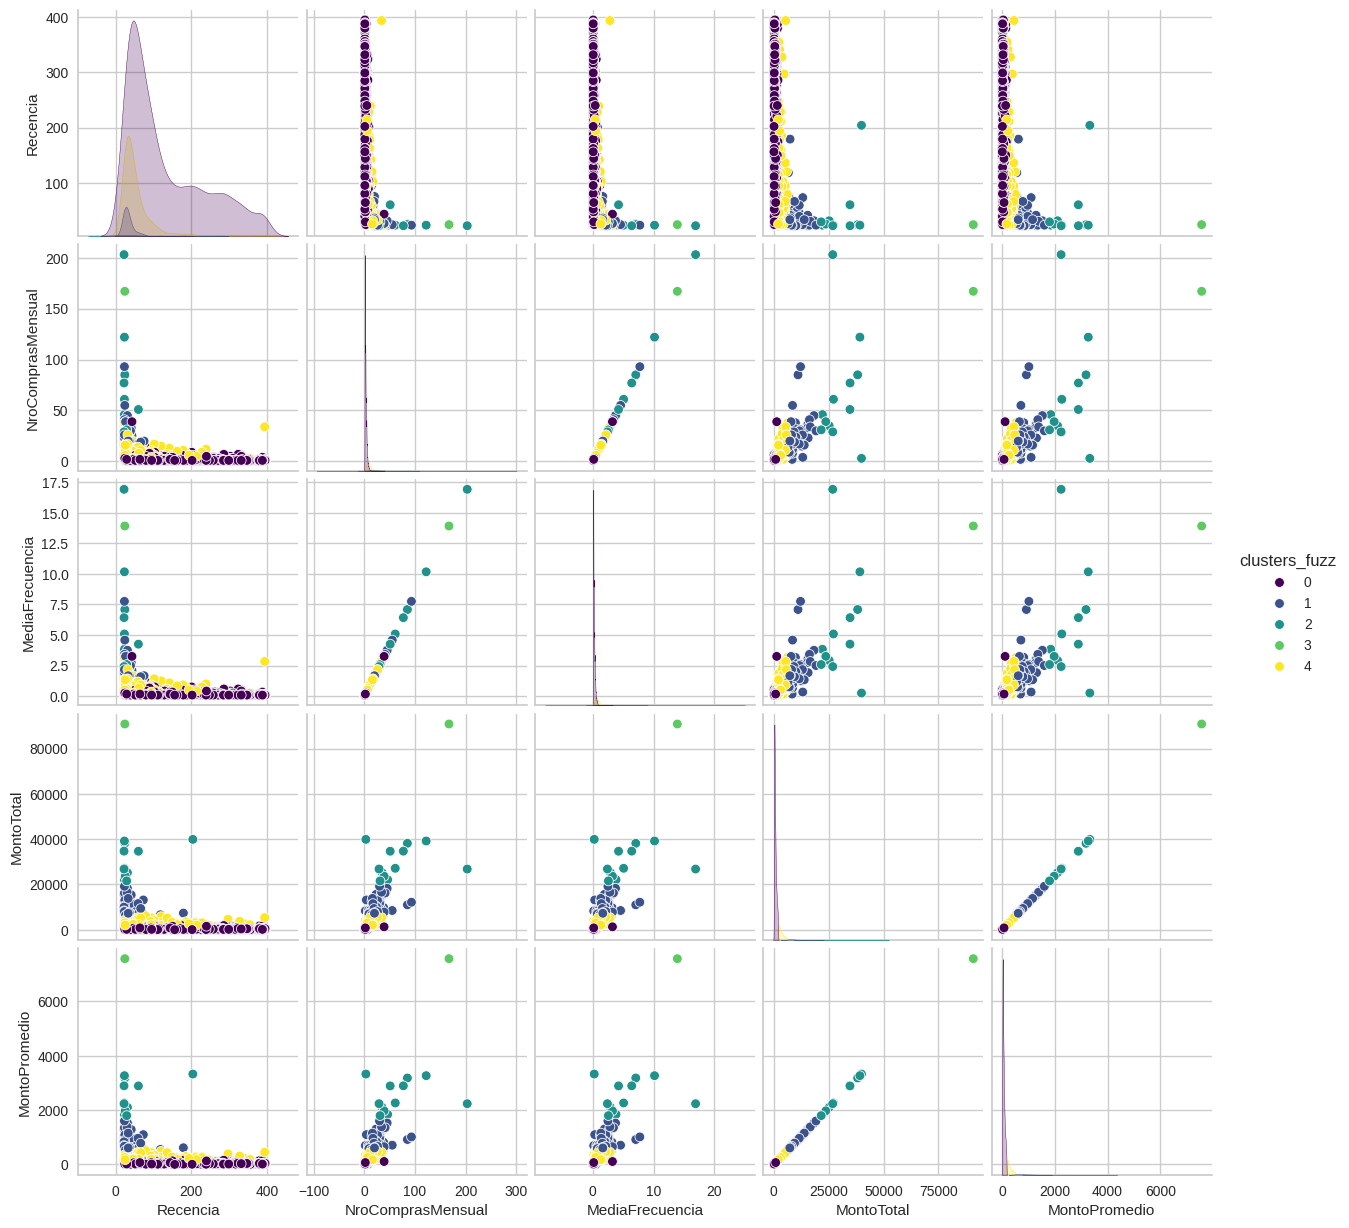

In [27]:
# Realizar clustering con el valor óptimo de m
optimal_cntr, optimal_u, optimal_u0, optimal_d, optimal_jm, optimal_p, optimal_fpc = fuzz.cluster.cmeans(
    X_fuzzy.T, 5, optimal_m, error=0.005, maxiter=1000
)
X_fuzzy['clusters_fuzz'] = np.argmax(optimal_u, axis=0)

sns.pairplot(X_fuzzy, hue='clusters_fuzz', palette='viridis')

### Pregunta 5

5. Evaluar la calidad de los clustering de forma numérica y realizar una explicación de cada segmento asignándoles un nombre descriptivo.


In [28]:
clus = X_kmeans.merge(X_fuzzy, on=['Recencia','NroComprasMensual','MediaFrecuencia','MontoTotal','MontoPromedio'])

El cluster 0 en kmeans es el mismo que el cluster 4 en fuzz
En kmeans considero 639 clientes pero en Fuzz 633
Cluster de compra intermedio bajo, con un promedio de frecuencia de compra de 0.75 y un gasto promedio e 270.78

El cluster 1 en kmeans es el mismo que el cluster 3 en fuzz
En kmeans considero 12 clientes igual que en Fuzz (los mismos)
Cluster de compra alto, con un promedio de frecuencia de compra de 5.430556 y un gasto promedio e 2499.9

El cluster 2 en kmeans es el mismo que el cluster 2 en fuzz
En kmeans considero 100 clientes igual que en Fuzz (los mismos)
Cluster de compra intermedio alto, con un promedio de frecuencia de compra de 1.853333 y un gasto promedio e 786.8

El cluster 3 en kmeans es el mismo que el cluster 0 en fuzz
En kmeans considero 1 clientes igual que en Fuzz (los mismos)
Cluster que mas compra, con un promedio de frecuencia de compra de 13.916667 y un gasto promedio e 7570.9

El cluster 4 en kmeans es el mismo que el cluster 1 en fuzz
En kmeans considero 3484 clientes pero en Fuzz 3490 
Cluster de compra bajo, con un promedio de frecuencia de compra de 0.197115 y un gasto promedio e 51.63
    

In [29]:
clus[clus.clusters_means == 0].describe()

,Recencia,NroComprasMensual,MediaFrecuencia,MontoTotal,MontoPromedio,clusters_means,clusters_fuzz
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.0,639.000000
mean,53.638498,9.032864,0.752739,3249.450047,270.787504,0.0,3.962441
std,44.649444,5.021944,0.418495,1108.370208,92.364184,0.0,0.386079
min,22.000000,1.000000,0.083333,1931.250000,160.937500,0.0,0.000000
25%,29.000000,6.000000,0.500000,2334.050000,194.504167,0.0,4.000000
50%,39.000000,8.000000,0.666667,2920.340000,243.361667,0.0,4.000000
75%,59.000000,11.000000,0.916667,3923.950000,326.995833,0.0,4.000000
max,394.000000,38.000000,3.166667,6316.570000,526.380833,0.0,4.000000


In [30]:
clus[clus.clusters_means == 1].describe()

,Recencia,NroComprasMensual,MediaFrecuencia,MontoTotal,MontoPromedio,clusters_means,clusters_fuzz
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.0
mean,42.333333,65.166667,5.430556,29999.363333,2499.946944,1.0,2.0
std,52.007575,53.327178,4.443931,6866.949790,572.245816,0.0,0.0
min,22.000000,3.000000,0.250000,21560.630000,1796.719167,1.0,2.0
25%,22.750000,34.000000,2.833333,24819.107500,2068.258958,1.0,2.0
50%,23.500000,48.500000,4.041667,26985.675000,2248.806250,1.0,2.0
75%,29.500000,79.000000,6.583333,35577.505000,2964.792083,1.0,2.0
max,204.000000,203.000000,16.916667,39916.500000,3326.375000,1.0,2.0


In [31]:
clus[clus.clusters_means == 2].describe()

,Recencia,NroComprasMensual,MediaFrecuencia,MontoTotal,MontoPromedio,clusters_means,clusters_fuzz
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
mean,34.690000,22.240000,1.853333,9441.971400,786.830950,2.0,1.0
std,20.745059,13.089529,1.090794,2941.948485,245.162374,0.0,0.0
min,22.000000,2.000000,0.166667,6403.250000,533.604167,2.0,1.0
25%,24.000000,15.000000,1.250000,7127.137500,593.928125,2.0,1.0
50%,29.000000,20.000000,1.666667,8518.285000,709.857083,2.0,1.0
75%,36.250000,26.000000,2.166667,11142.412500,928.534375,2.0,1.0
max,179.000000,93.000000,7.750000,19190.380000,1599.198333,2.0,1.0


In [32]:
clus[clus.clusters_means == 3].describe()

,Recencia,NroComprasMensual,MediaFrecuencia,MontoTotal,MontoPromedio,clusters_means,clusters_fuzz
count,1.0,1.0,1.000000,1.00,1.000000,1.0,1.0
mean,24.0,167.0,13.916667,90851.38,7570.948333,3.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,24.0,167.0,13.916667,90851.38,7570.948333,3.0,3.0
25%,24.0,167.0,13.916667,90851.38,7570.948333,3.0,3.0
50%,24.0,167.0,13.916667,90851.38,7570.948333,3.0,3.0
75%,24.0,167.0,13.916667,90851.38,7570.948333,3.0,3.0
max,24.0,167.0,13.916667,90851.38,7570.948333,3.0,3.0


In [33]:
clus[clus.clusters_means == 4].describe()

,Recencia,NroComprasMensual,MediaFrecuencia,MontoTotal,MontoPromedio,clusters_means,clusters_fuzz
count,3484.000000,3484.000000,3484.000000,3484.000000,3484.000000,3484.0,3484.0
mean,130.369690,2.365385,0.197115,619.607644,51.633970,4.0,0.0
std,104.350298,1.844039,0.153670,471.210337,39.267528,0.0,0.0
min,22.000000,1.000000,0.083333,2.900000,0.241667,4.0,0.0
25%,46.000000,1.000000,0.083333,243.915000,20.326250,4.0,0.0
50%,87.000000,2.000000,0.166667,476.075000,39.672917,4.0,0.0
75%,200.000000,3.000000,0.250000,891.457500,74.288125,4.0,0.0
max,395.000000,39.000000,3.250000,1931.710000,160.975833,4.0,0.0
